In [2]:
import sys
from pathlib import Path

# 1) 현재 작업 경로에서 위로 올라가면서 'src' 폴더가 있는 위치를 찾는다
ROOT = Path.cwd()
while ROOT != ROOT.parent and not (ROOT / "src").exists():
    ROOT = ROOT.parent

# 2) 찾은 루트를 sys.path에 추가
sys.path.append(str(ROOT))
print("PROJECT ROOT:", ROOT)
print("src exists:", (ROOT / "src").exists())

PROJECT ROOT: /home/nakyung/projects/tesla
src exists: True


In [7]:
from pathlib import Path
import pandas as pd

from src.tesla_data import load_tesla_data
from src.basic_eda import (
    summarize_dataframe,
    numeric_stats,
    plot_missing_values,
    count_categorical,
    plot_corr_heatmap,
    plot_year_month_dist,
    plot_basic_distributions,
)

data_path = Path("../data/tesla_deliveries_dataset_2015_2025.csv")

df = load_tesla_data(data_path)
df.head()

,Year,Month,Region,Model,Estimated_Deliveries,Production_Units,Avg_Price_USD,Battery_Capacity_kWh,Range_km,CO2_Saved_tons,Source_Type,Charging_Stations
0,2015,1,Asia,Cybertruck,11325,11887,54449.08,60,339,575.88,Estimated (Region),6902
1,2015,1,Asia,Model 3,8795,9165,87988.73,82,456,601.58,Official (Quarter),12626
2,2015,1,Asia,Model S,9537,10093,68994.43,82,484,692.39,Official (Quarter),7281
3,2015,1,Asia,Model X,7292,7298,107082.30,120,702,767.85,Estimated (Region),11748
4,2015,1,Asia,Model Y,12446,13885,55183.13,60,340,634.75,Official (Quarter),4390


### 전체 데이터프레임 요약

In [8]:
summarize_dataframe(df)


=== DataFrame Shape ===
(2640, 12) 

=== Columns & dtypes ===
Year                      int64
Month                     int64
Region                   object
Model                    object
Estimated_Deliveries      int64
Production_Units          int64
Avg_Price_USD           float64
Battery_Capacity_kWh      int64
Range_km                  int64
CO2_Saved_tons          float64
Source_Type              object
Charging_Stations         int64
dtype: object 

=== Head ===
   Year  Month Region       Model  Estimated_Deliveries  Production_Units  \
0  2015      1   Asia  Cybertruck                 11325             11887   
1  2015      1   Asia     Model 3                  8795              9165   
2  2015      1   Asia     Model S                  9537             10093   
3  2015      1   Asia     Model X                  7292              7298   
4  2015      1   Asia     Model Y                 12446             13885   

   Avg_Price_USD  Battery_Capacity_kWh  Range_km  CO2_Saved_to

### numeric summary statistics

In [9]:
numeric_stats(df)

=== Numeric Summary Statistics ===
                       count          mean           std       min        25%  \
Year                  2640.0   2020.000000      3.162877   2015.00   2017.000   
Month                 2640.0      6.500000      3.452707      1.00      3.750   
Estimated_Deliveries  2640.0   9922.199621   3935.950093     48.00   7292.000   
Production_Units      2640.0  10655.847348   4260.600858     50.00   7828.250   
Avg_Price_USD         2640.0  84907.340330  20123.258036  50003.70  67726.365   
Battery_Capacity_kWh  2640.0     87.059470     20.836265     60.00     75.000   
Range_km              2640.0    500.257576    120.868549    330.00    418.000   
CO2_Saved_tons        2640.0    744.076989    353.221224      3.07    499.620   
Charging_Stations     2640.0   8932.133712   3469.565883   3002.00   5897.750   

                            50%          75%        max  
Year                   2020.000    2023.0000    2025.00  
Month                     6.500       

,count,mean,std,min,25%,50%,75%,max
Year,2640.0,2020.000000,3.162877,2015.00,2017.000,2020.000,2023.0000,2025.00
Month,2640.0,6.500000,3.452707,1.00,3.750,6.500,9.2500,12.00
Estimated_Deliveries,2640.0,9922.199621,3935.950093,48.00,7292.000,9857.000,12510.2500,25704.00
Production_Units,2640.0,10655.847348,4260.600858,50.00,7828.250,10546.500,13469.0000,28939.00
Avg_Price_USD,2640.0,84907.340330,20123.258036,50003.70,67726.365,85058.510,102373.0425,119965.36
Battery_Capacity_kWh,2640.0,87.059470,20.836265,60.00,75.000,82.000,100.0000,120.00
Range_km,2640.0,500.257576,120.868549,330.00,418.000,470.000,586.2500,719.00
CO2_Saved_tons,2640.0,744.076989,353.221224,3.07,499.620,699.515,943.7650,2548.55
Charging_Stations,2640.0,8932.133712,3469.565883,3002.00,5897.750,8901.500,11938.0000,14996.00


### 결측치 시각화

In [10]:
plot_missing_values(df)

>> No Missing Values Found.


### 카테고리컬 컬럼 value_counts

In [11]:
count_categorical(df, ["Region", "Model", "Source_Type"])


=== Value Counts: Region ===
Region
Asia             660
Europe           660
Middle East      660
North America    660
Name: count, dtype: int64


=== Value Counts: Model ===
Model
Cybertruck    528
Model 3       528
Model S       528
Model X       528
Model Y       528
Name: count, dtype: int64


=== Value Counts: Source_Type ===
Source_Type
Official (Quarter)      884
Interpolated (Month)    884
Estimated (Region)      872
Name: count, dtype: int64



### 상관관계 히트맵

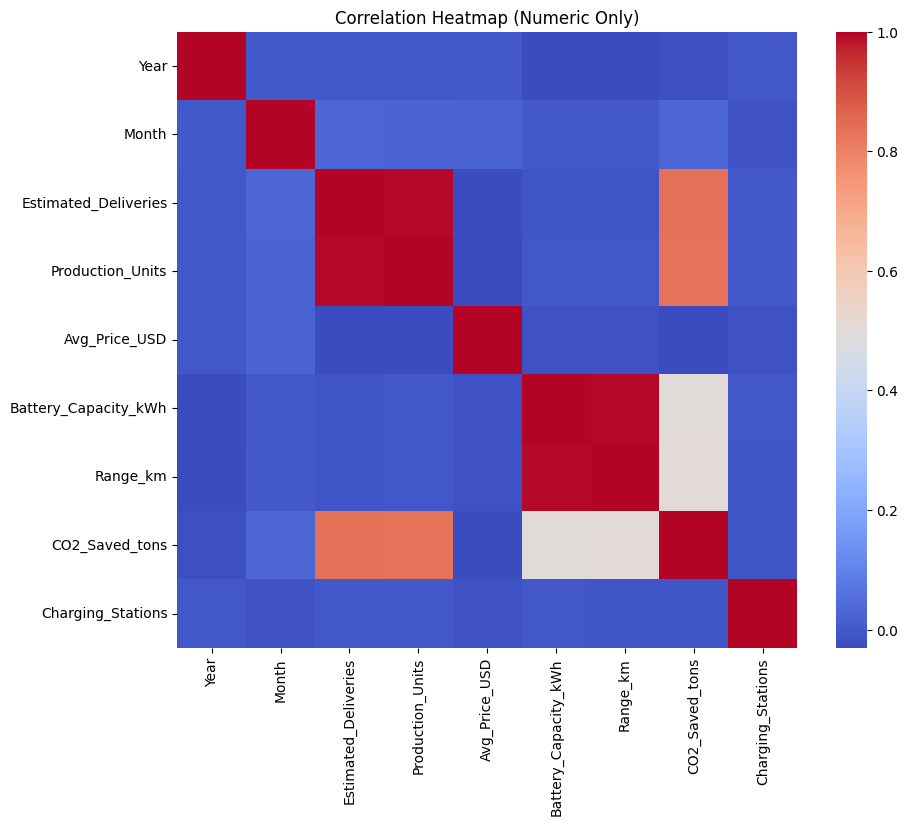

In [12]:
plot_corr_heatmap(df)

### 연도/월 분포

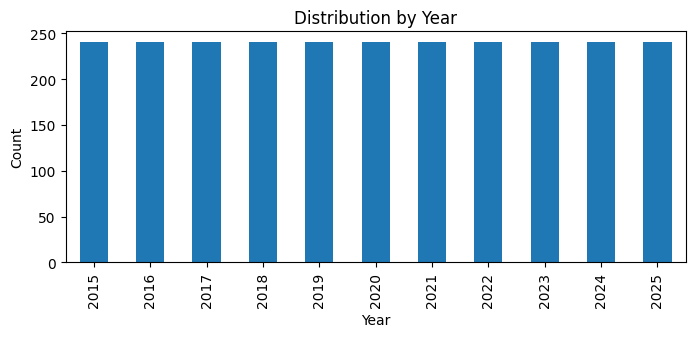

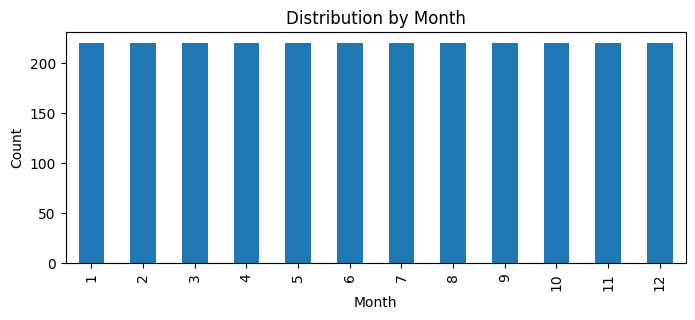

In [13]:
plot_year_month_dist(df)

### numeric 기본 분포 히스토그램

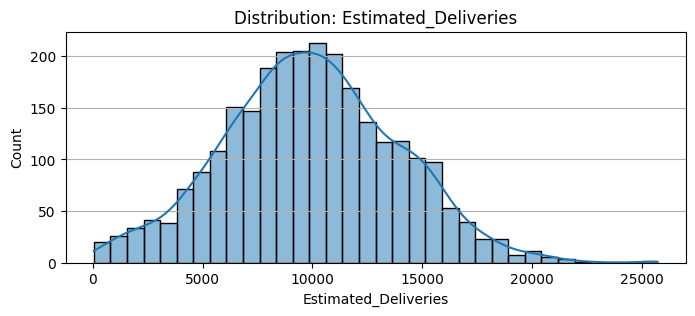

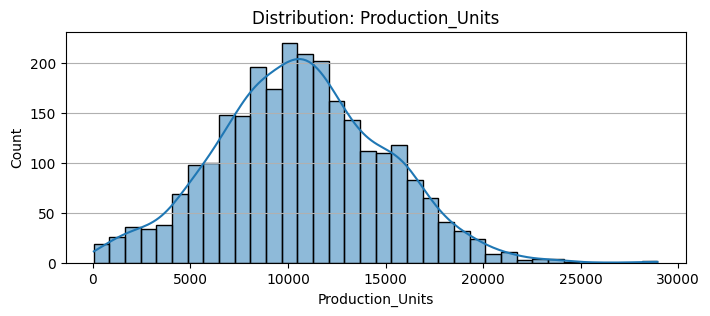

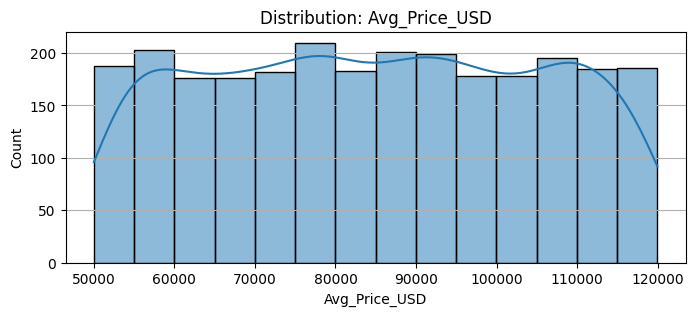

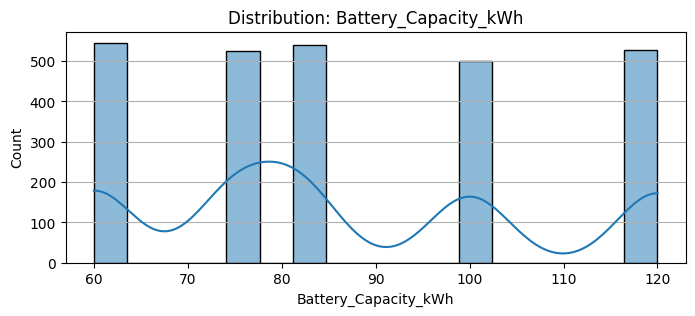

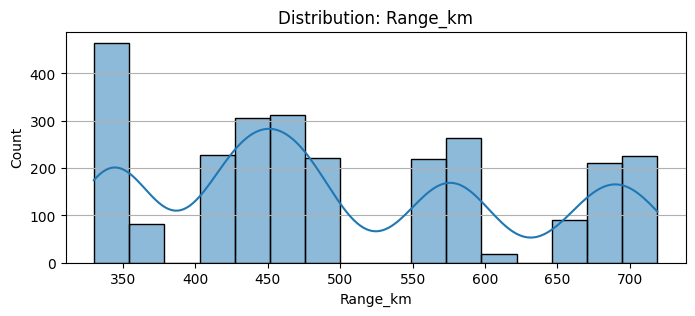

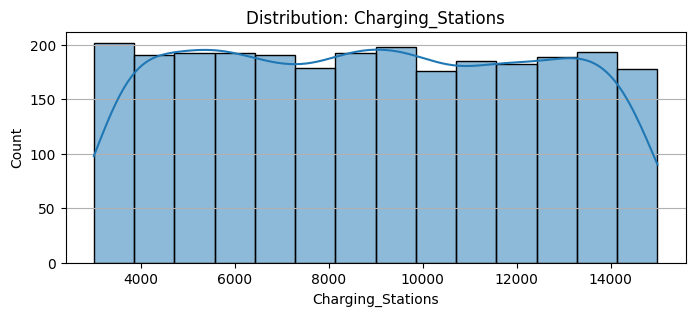

In [14]:
plot_basic_distributions(df)